# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
sns.set_style('whitegrid')

In [2]:
sns.set_palette(sns.cubehelix_palette(8, light=.6))

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


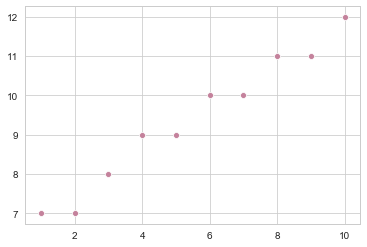

In [4]:
sns.scatterplot(X,Y)

In [5]:
# This function will calculate the slope of the model
# (mean(x) * mean(y) - mean(x*y)) / (mean(x)^2 - mean(x^2))
def calc_slope(xs,ys):
    
    times = xs*ys
    x_sq = xs**2
    numer = xs.mean() * ys.mean() - times.mean()
    denom = (xs.mean()**2) - x_sq.mean()
    slope = numer / denom
    
    return slope

In [6]:
calc_slope(X,Y)

0.5575757575757568

In [7]:
# This function will calculate the Y-intercept of the model.
# Where m is the slope and c is the Y-intercept
def best_fit(xs,ys):
    
    m = calc_slope(xs,ys)
    c = np.mean(ys) - (m*np.mean(xs))
    
    return m, c

m, c = best_fit(X,Y)
m, c

(0.5575757575757568, 6.3333333333333375)

In [8]:
# This function will use the slope and intercept functions to produce the 
# regression model
def reg_line(m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

In [9]:
Y_pred = reg_line(m, c, X)

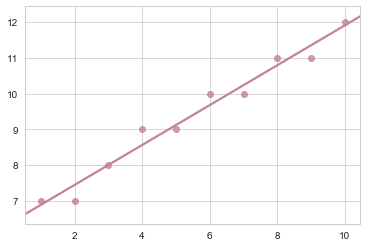

In [10]:
sns.regplot(X,Y,regression_line,ci=0)

In [11]:
# This function will calculate the squared error to be used in calculating the
# R-Squared value
def sum_sq_err(y_real, y_predicted):
    
    ss_tot = np.sum((y_real - y_predicted)**2)
    
    return round(ss_tot, 2)

In [12]:
# This function will then calculate the R-Squared value
def r_square(ys_real, ys_predicted):
    y_mean = [np.mean(ys_real) for y in ys_real]
    
    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    r_sq = 1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

In [13]:
r_squared = r_square(Y, Y_pred)

In [14]:
def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, label ='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.legend(loc=4)
    plt.show()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


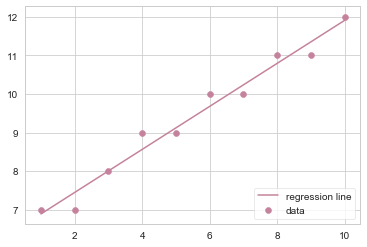

In [15]:
print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope:', round(m, 2))
print ('Y-Intercept:', round(c, 2))
print ('R-Squared:', round(r_squared, 2))
print ('----------------------------')
print ('Model: Y =',round(m, 2),'* X +', round(c, 2))

plot_reg(X, Y, Y_pred)

In [16]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [17]:
x_new = 4.5
y_new = (m*x_new)+c
y_new

8.842424242424244

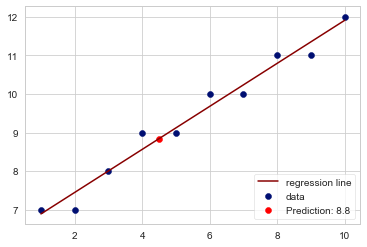

In [18]:
plt.scatter(X, Y, color='#000F72', label='data')
plt.plot(X, Y_pred, color='#880000', label='regression line')
plt.scatter(x_new, y_new, color='r', label='Prediction: '+ str(np.round(y_new, 1)))
plt.legend(loc=4)
plt.show()

In [19]:
# Make prediction for x = 4.5 and visualize on the scatter plot

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [20]:
df = pd.read_csv('heightweight.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
height    20 non-null int64
weight    20 non-null int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [21]:
X = df['height']
Y = df['weight']

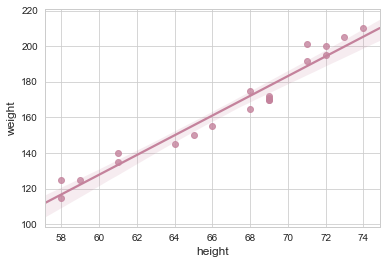

In [22]:
sns.regplot(X,Y)

In [23]:
X = np.array(X)
Y = np.array(Y)

In [24]:
m, c = best_fit(X, Y)
m, c

(5.539019232705614, -204.48343570637024)

In [25]:
Y_pred = reg_line(m, c, X)
Y_pred

[172.16987211761148,
 188.78692981572834,
 133.39673748867216,
 177.70889135031712,
 188.78692981572834,
 116.77967979055535,
 194.32594904843393,
 199.86496828113957,
 116.77967979055535,
 205.40398751384515,
 133.39673748867216,
 122.31869902326093,
 177.70889135031712,
 172.16987211761148,
 150.01379518678903,
 177.70889135031712,
 194.32594904843393,
 161.09183365220025,
 155.55281441949467,
 177.70889135031712]

In [26]:
r_squared = r_square(Y, Y_pred)
r_squared

0.9553100230761513

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48


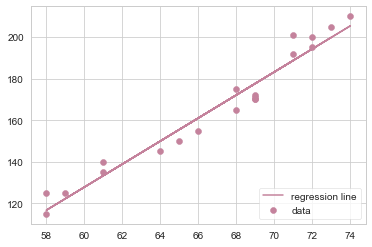

In [27]:
print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope:', round(m, 2))
print ('Y-Intercept:', round(c, 2))
print ('R-Squared:', round(r_squared, 2))
print ('----------------------------')
print ('Model: Y =',round(m, 2),'* X +', round(c, 2))

plot_reg(X, Y, Y_pred)